In [ ]:
import numpy as np
import scipy
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [ ]:
class NN:
    def __init__(self, input_size, hidden_size, output_size, name):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.name=name

        # Initialize weights randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)

    def set_name(self, str_name):
        self.name = str_name
        return None

    def weights(self):
        return {
            "input_hidden": self.weights_input_hidden,
            "hidden_output": self.weights_hidden_output
        }
    def set_weights(self, weights_input2hidden, weights_hidden2output):
        self.weights_input_hidden = weights_input2hidden
        self.weights_hidden_output = weights_hidden2output
        return None
    def set_weights_input2hidden(self, weights_input2hidden):
        self.weights_input_hidden = weights_input2hidden
        return None
    def set_weights_hidden2output(self, weights_hidden2output):
        self.weights_hidden_output = weights_hidden2output
        return None
    def hidden(self):
        return self.hidden_size
    def evaluate(self, input_data):
        # Forward pass
        hidden_layer_input = np.dot(input_data, self.weights_input_hidden)
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        output = self.sigmoid(output_layer_input)
        return output
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [ ]:
def concept(x, typ):
    if typ==0:
        return 4*x-4*x**2
    elif typ==1:
        return x**2
    else:
        return x*(3*x-2)**2

In [ ]:
NUM_COORDS = 5
X=np.random.rand(NUM_COORDS,1)

In [ ]:
def concept_lec(typ,X_c):
    Y_c=concept(X_c, typ)
    return Y_c

In [ ]:
def lecture_obj(varbls, *params):
    inp, hid,out, stu , X_data, Y_data= params
    wi2h_flat, wh2o_flat=varbls[:inp*hid],varbls[inp*hid:]
    wi2h=np.reshape(wi2h_flat,(inp,hid))
    wh2o=np.reshape(wh2o_flat,(hid,out))
    stu.set_weights(wi2h, wh2o)
    e=0
    for i in range(len(X_data)):
        e+=(scipy.linalg.norm(stu.evaluate(X_data[i])-Y_data[i]))**2
    return e

In [ ]:
#Create Class
N=20
roster=[]
for i in range(N):
    input_size = 1
    hidden_size = np.random.randint(1, 10)
    output_size = 1
    # Create an instance of NN
    roster.append(NN(input_size, hidden_size, output_size, str(i)))
print(roster[0].evaluate(3))

[[0.40114725]]


In [ ]:
def lecture_learn(rost, asg, m, X):
    Y_learn=concept_lec(asg,X)
    max_iterations=20
    for j in range(len(rost)):
        flag=False
        k=0
        input_size=rost[j].input_size
        hidden_size=rost[j].hidden_size
        output_size=rost[j].output_size
        while(not flag):
            initial_guess = np.concatenate((np.random.randn(input_size, hidden_size).flatten(),np.random.randn(hidden_size, output_size).flatten()))
            params=(input_size,hidden_size,output_size, rost[j], X, Y_learn)
            result = optimize.minimize(lecture_obj, initial_guess, args=params)
            k+=1
            flag=(result.success or (k>max_iterations))
        wi2h_flat, wh2o_flat=result.x[:input_size*hidden_size],result.x[input_size*hidden_size:]
        wi2h=np.reshape(wi2h_flat,(input_size,hidden_size))
        wh2o=np.reshape(wh2o_flat,(hidden_size,output_size))
        rost[j].set_weights(wi2h, wh2o)
    print("Assignment: "+str(asg)+" - Learning complete.")
    return None

In [ ]:
def active_learn(student,initial_guess, X_learn, Y_learn):
  input_size=student.input_size
  hidden_size=student.hidden_size
  output_size=student.output_size
  params=(input_size,hidden_size,output_size, student, X_learn, Y_learn)
  result = optimize.minimize(lecture_obj, initial_guess, args=params)
  if(result.success == False):
    return

  wi2h_flat, wh2o_flat=result.x[:input_size*hidden_size],result.x[input_size*hidden_size:]
  wi2h=np.reshape(wi2h_flat,(input_size,hidden_size))
  wh2o=np.reshape(wh2o_flat,(hidden_size,output_size))
  student.set_weights(wi2h, wh2o)


In [ ]:
# woke class --> active learning!

N=21
groups = 3
assert(N%groups == 0) # nobody left out
HIDDEN_NEURONS = 5
EPOCHS = 20
roster=[]
for i in range(N):
    input_size = 1
    hidden_size = HIDDEN_NEURONS #np.random.randint(1, 10)
    output_size = 1
    # Create an instance of NN
    roster.append(NN(input_size, hidden_size, output_size, str(i)))

# active learning teaching
# focus on one concept for now
Y_learn=concept_lec(1,X)
for e in range(EPOCHS):
  for x in X:
    for i in range(0,N,groups):
      guesses = 0
      for j in range(groups):
        guesses += roster[i+j].evaluate(x)
      guesses /= groups

      for j in range(groups):
        active_learn(roster[i+j], guesses, X, Y_learn)

ValueError: cannot reshape array of size 1 into shape (1,5)

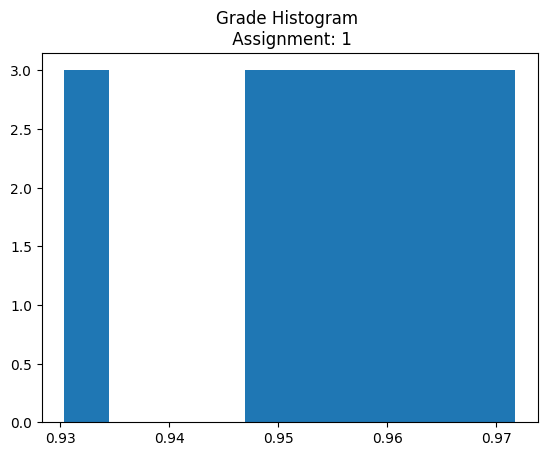

In [ ]:
gr=[grade(roster[i],1) for i in range(len(roster))]
#grades_n=np.array(grades)/max(grades)
#grades_s=1-grades_n
hist,bins =np.histogram(gr)
plt.hist(gr, bins = bins)
plt.title("Grade Histogram \n Assignment: "+str(1))
plt.show()

In [ ]:
def grade(stu, asg):
    x_grad=np.linspace(0, 1, num=20)
    y_grad=[stu.evaluate(x_grad[i])[0][0] for i in range(len(x_grad))]
    y_key=[concept(x_grad[i], asg) for i in range(len(x_grad))]
    #L2 norm
    L=scipy.linalg.norm(np.array(y_key)-np.array(y_grad))/len(x_grad)
    return 1-L

In [ ]:
def plot_learn(stu, gr, asg):
    x_plot=np.linspace(0, 1, num=20)
    y_plot=[stu.evaluate(x_plot[i])[0][0] for i in range(len(x_plot))]
    y_plot_c=[concept(x_plot[i], asg) for i in range(len(x_plot))]
    # plot
    fig, ax = plt.subplots()
    ax.plot(x_plot, y_plot_c, linewidth=1.0, linestyle='dashed')
    ax.plot(x_plot, y_plot, linewidth=2.0)
    ax.set_title("4x-4x^2"+"\n Name: "+stu.name+"\n Hidden: "+str(stu.hidden_size)+"\n Grade: "+gr+"\n Assignment: "+str(asg))
    plt.show()
    return None

In [ ]:
#Create Class
N=20
roster=[]
for i in range(N):
    input_size = 1
    hidden_size = np.random.randint(1, 10)
    output_size = 1
    # Create an instance of NN
    roster.append(NN(input_size, hidden_size, output_size, str(i)))


In [ ]:
#Teaching
resolution=10
gradebook=[]

for assignment in range(3):
    lecture_learn(roster, assignment,resolution, X)
    gr=[grade(roster[i],assignment) for i in range(len(roster))]
    gradebook.append(gr)


Assignment: 0 - Learning complete.
Assignment: 1 - Learning complete.
Assignment: 2 - Learning complete.


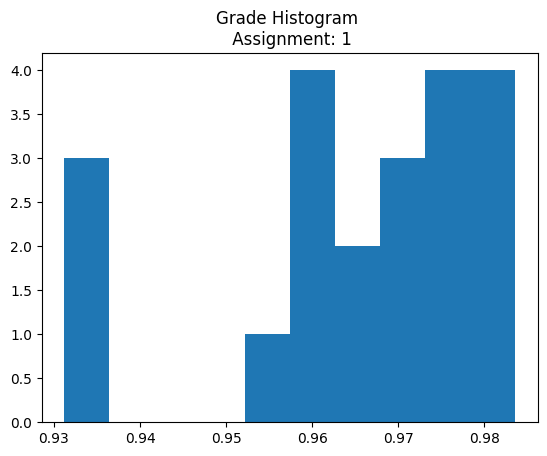

In [ ]:
#Histogram
a=1
grades=gradebook[a]
#grades_n=np.array(grades)/max(grades)
#grades_s=1-grades_n
hist,bins =np.histogram(grades)
plt.hist(grades, bins = bins)
plt.title("Grade Histogram \n Assignment: "+str(a))
plt.show()

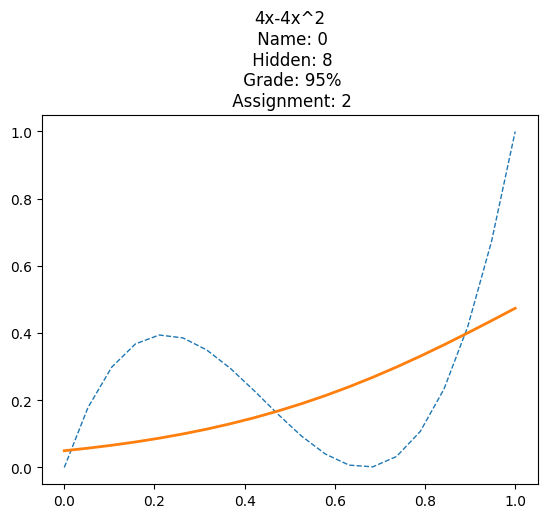

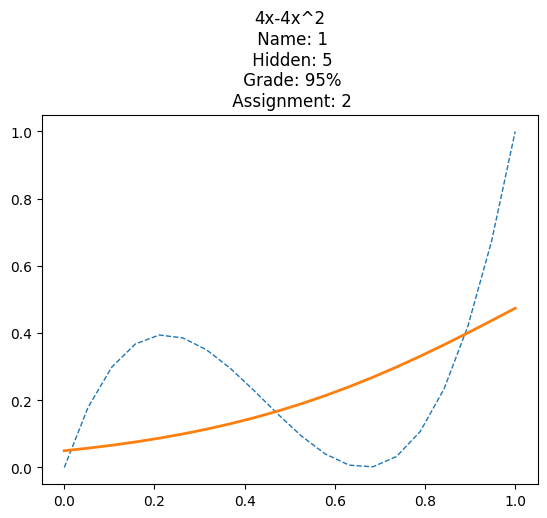

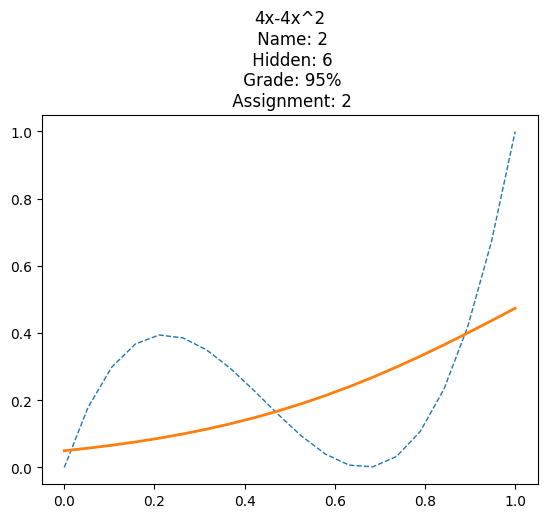

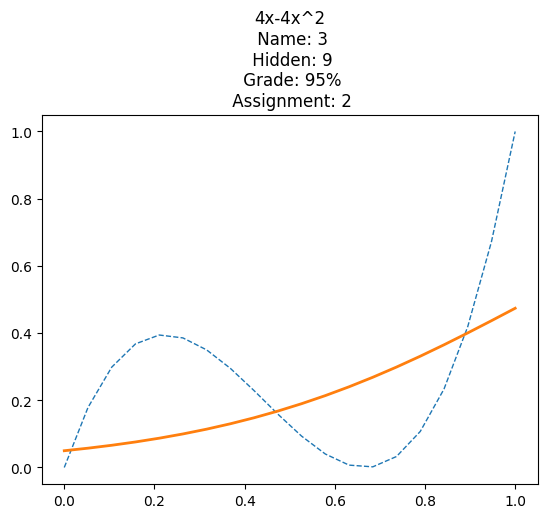

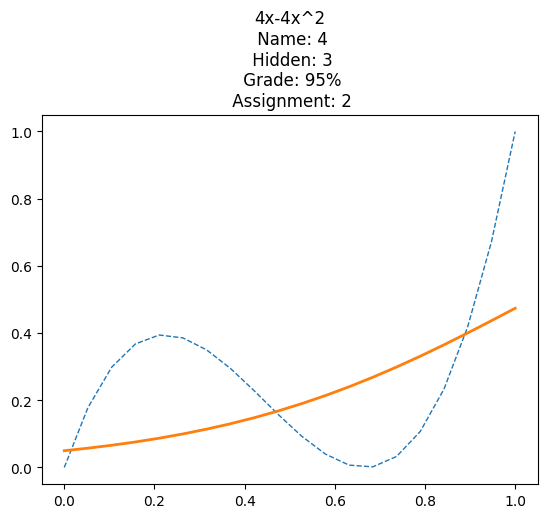

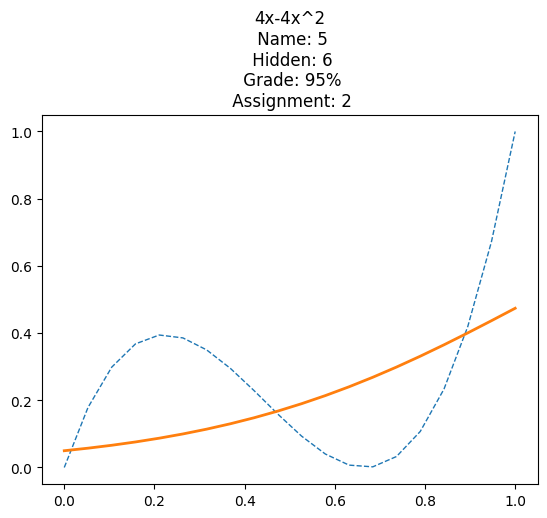

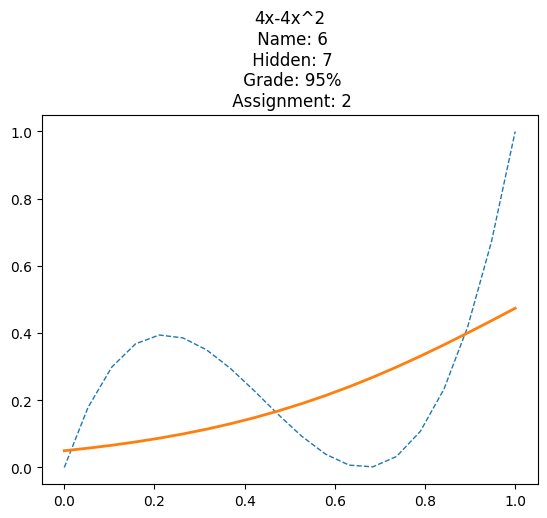

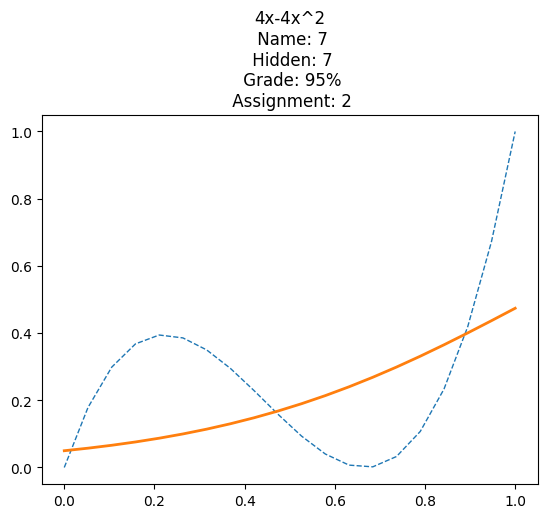

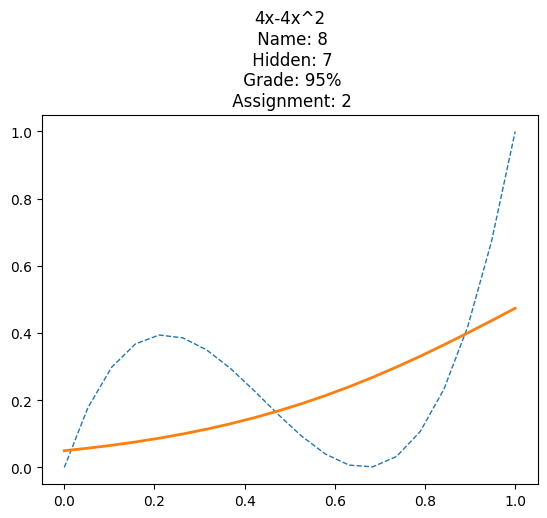

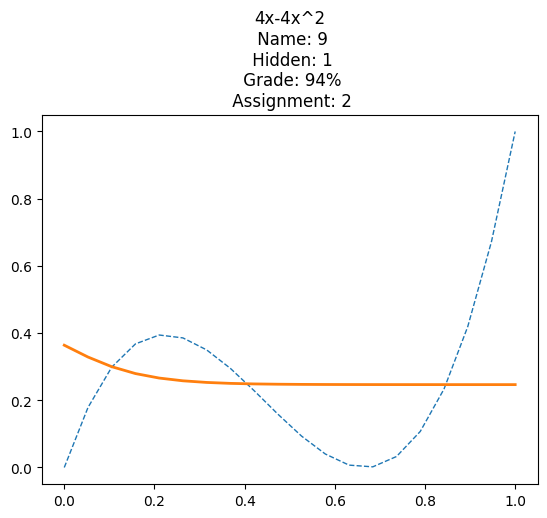

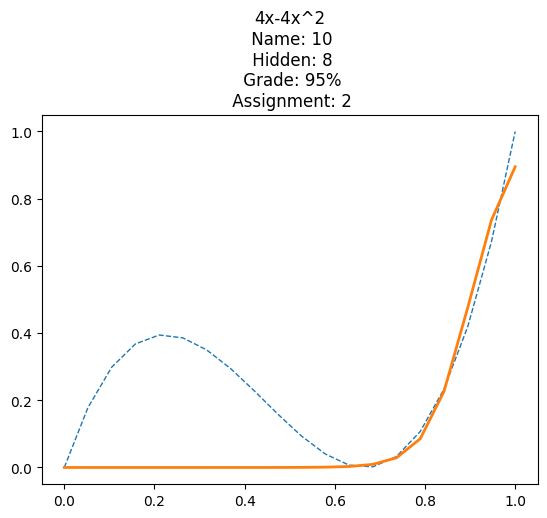

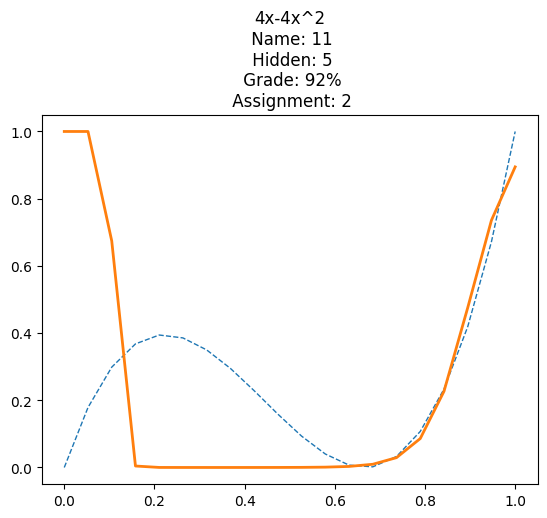

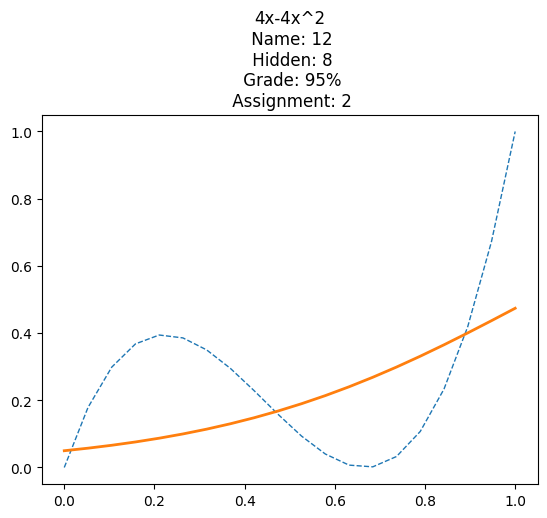

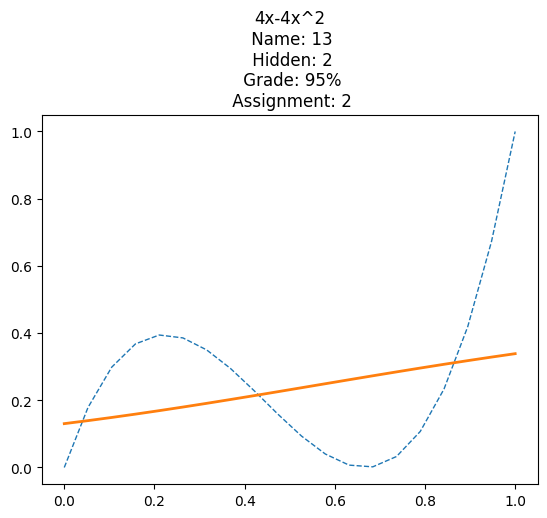

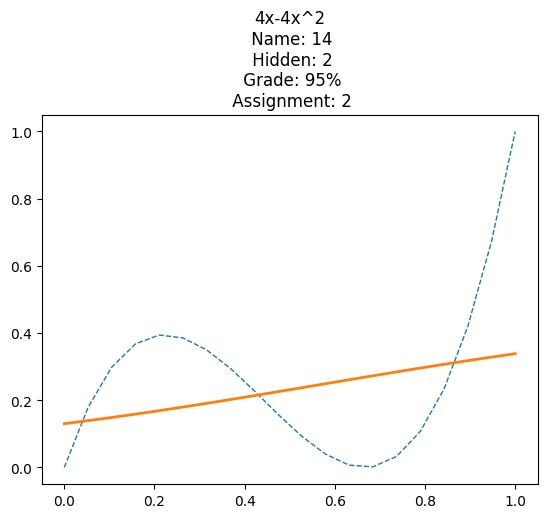

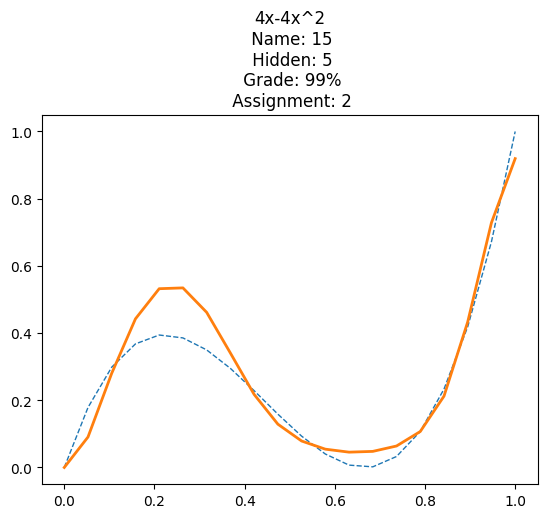

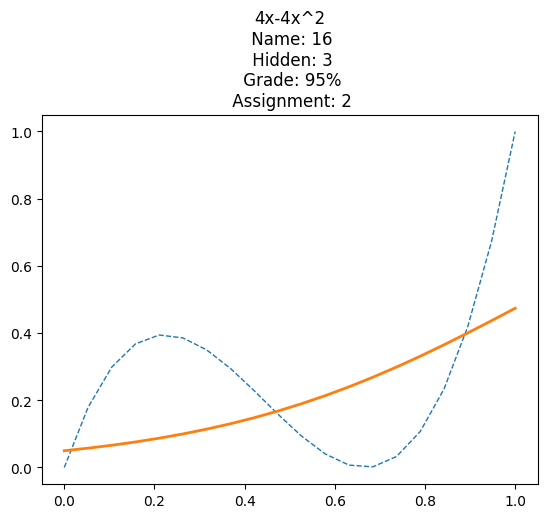

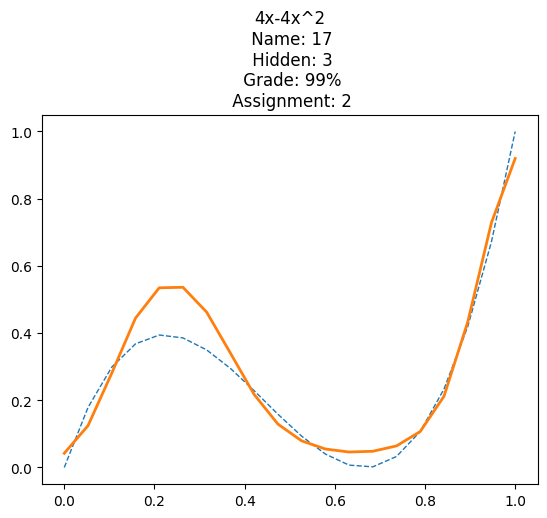

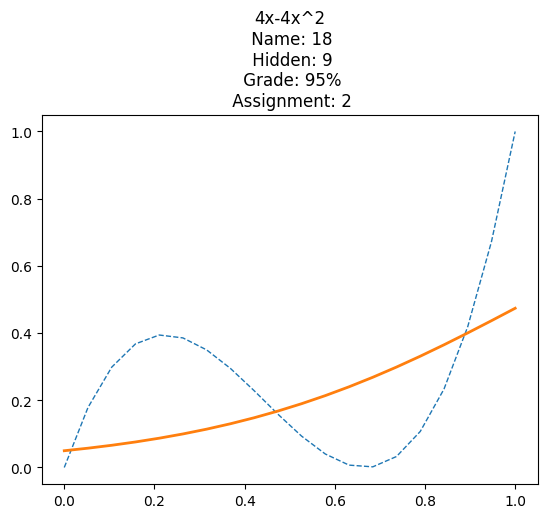

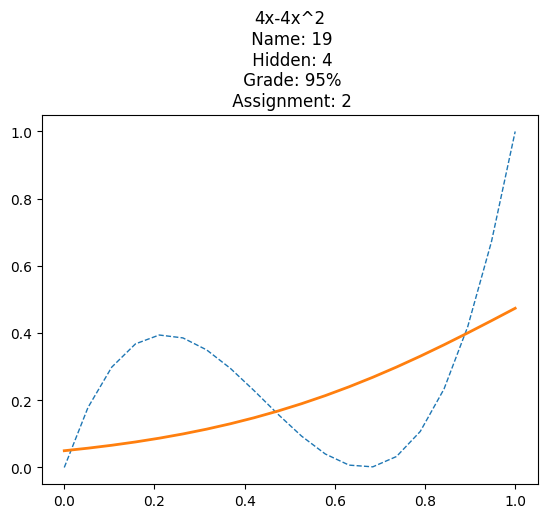

In [ ]:
for i in range(len(roster)):
    #print(grade(roster[i]))
    plot_learn(roster[i], "{:.0%}".format(grades[i]),a)

In [ ]:
overall_grade=[sum(x)/len(x) for x in zip(*gradebook)]

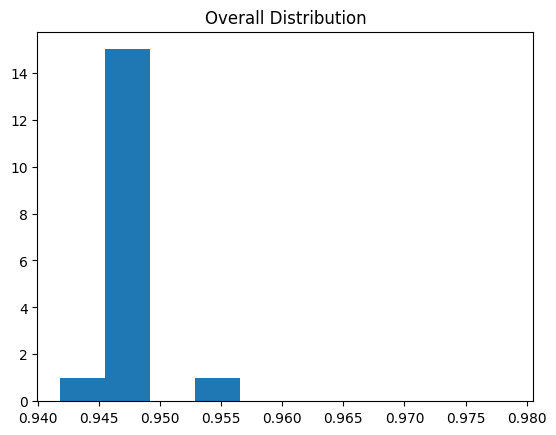

In [ ]:
hist,bins =np.histogram(overall_grade)
plt.hist(grades, bins = bins)
plt.title("Overall Distribution")
plt.show()